In [82]:
%run stdPackages.ipynb

# Marginal Abatement Costs

## 1. A Toy Model of Abatement Costs

In the first exercise,  we consider the model from the note *A Simple Model of Abatement Costs* in section 1. We will use specific assumptions on production and climate damages as follows:
* Production is isoelastic with $F(E) = \gamma E^{\alpha}$ where $\gamma>0$ and $\alpha\in(0,1)$ are constants. We will use $\alpha = 0.5$ and $\gamma =1$ in the following.
* The cost of extracting fossil energy is normalized at $p_e = 1$.
* Climate damages are quadratic with $D(M) = \gamma_D M^2 /2$, where we will use $\gamma_D = 100$ in the following.
* The emission intensity of fossil energy is set to $\phi = 0.25$.

*We define preliminary symbols:*

In [83]:
α  = .5
γ  = 1
pe = 1 # price on e
ϕ  = .25
γd = 100 # scalar in damage function 

### **Q 1.1. Consumption and Emissions As a Function of $E$**

*We want to plot consumption ($C$) and emissions ($M$) as a function of $E$. To do so, do the following:*
1. *Define ```Egrid``` as a linearly spaced grid from 0 to 1 with 1000 steps. Store it as a ```pd.Index```.*
2. *For each $E_j\in$ ```Egrid```, solve for a corresponding value of $C_j$ and $M_j$.* *Define ```Cgrid``` and ```Mgrid``` as pandas series with these values and ```Egrid``` as the index.*
3. *Plot both in one, e.g. by collecting them as one dataframe and using pandas build-in ```.plot()``` function.*

<Axes: xlabel='E'>

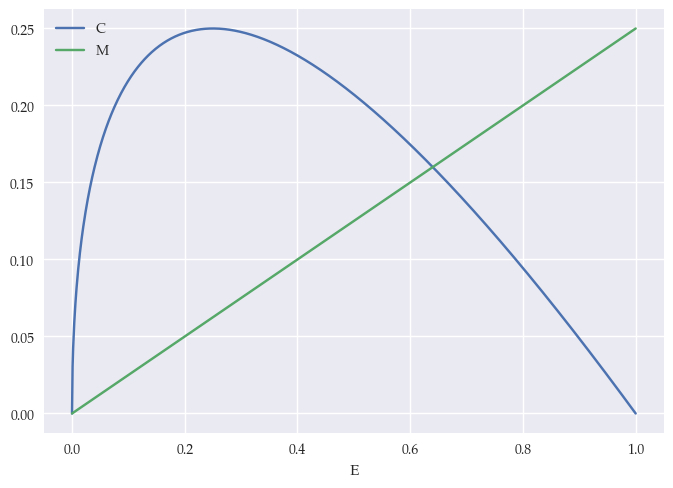

In [84]:
Egrid = pd.Index(np.linspace(0,1,1000), name = 'E')
Cgrid = pd.Series(γ * np.power(Egrid,α) - pe * Egrid, index = Egrid, name = 'C')
Mgrid = pd.Series(ϕ * Egrid, index = Egrid, name = 'M')
df = pd.concat([Cgrid, Mgrid], axis = 1)
df.plot()

### **Q 1.2. Baseline and optimal solutions**

*Next, we want to compare the "baseline" solution to the optimal one. As mentioned in the lecture note, the baseline solution maximizes consumption without considering the climate externality, that is:*

$$\begin{align}
    C^0 = \max\left(F(E)-p_eE\right).
\end{align}$$

*The first order condition for $E^0$ is then given by $F'(E)=p_e$. Solving this, we can write the baseline solution as:*

$$\begin{align}
    E^0 &= \left(\dfrac{\gamma \alpha}{p_e}\right)^{\frac{1}{1-\alpha}} \\ 
    C^0 &= \gamma \left(E^0\right)^{\alpha}-p_e E^0 \\ 
    M^0 &= \phi E^0.
\end{align}$$

*The optimal solution is the one that internalizes the climate externality, that is*

$$\begin{align}
    C^* = \max\left(F(E)-p_eE-D(M)\right).
\end{align}$$

*With the functional forms used in this model, the condition that identifies the optimal $E^*$ (eq (3) from the lecture note), is given by:*

$$\begin{align}
    \alpha \gamma E^{\alpha-1}-p_e-\gamma_D\phi^2E = 0. \tag{1}
\end{align}$$

1. *Compute the level of "baseline" consumption $(C^0)$, fossil energy consumption $(E^0)$, and emissions $(M^0)$.*
2. *Solve for the optimal solution $C^*, E^*, M^*$.*

*Hint: There are several ways of numerically solving nonlinear equations like (1). One way is to use the ```fsolve``` method from ```scipy.optimize```. The ```scipy.optimize.fsolve(f, x0)``` solves the problem $f(x) = 0$ numerically, starting from the guess ```x0```. The following snippet, for instance, would solve for the x that satisfies $x^2-2x = 0$ starting with a guess of $x=1$:*
```python
x = scipy.optimize.fsolve(lambda x: x**2-2x, 1)
```


In [85]:
E_0 = (γ * α/pe)**(1/(1-α))
C_0 = γ*(E_0)**α-pe*E_0
M_0  = ϕ*E_0
E_star = scipy.optimize.fsolve(lambda E: γ*α*E**(α-1)-pe-γd*(ϕ**2)*E, 0.5) 
M_star  = ϕ*E_star
C_star = γ*(E_star)**α-pe*E_star-γ*M_star**2/2
print(E_0, C_0, M_0)
print(E_star, C_star, M_star)

0.25 0.25 0.0625
[0.09694172] [0.21411925] [0.02423543]


### **Q 1.3. Plot marginal abatement costs and marginal damages**

*We want to plot something like figure 1.3 in the lecture note:*
1. *Use ```Egrid``` from Q1.1. For each $E_j \in$```Egrid```, compute the marginal abatement costs and collect them in a vector ```MACgrid``` (e.g. a numpy array). Recall that the MAC curve is defind in (3) in the lecture note as*

$$\begin{align}
    MAC = \dfrac{F'(E)-p_e}{\phi} = \dfrac{\gamma\alpha E^{\alpha-1}-p_e}{\phi}.
\end{align}$$

2. *For each $E_j\in$```Egrid```, compute the marginal damages and collect them in a vector ```MDgrid``` (e.g. a numpy array). Recall that marginal damages are defined as*

$$\begin{align}
    D'(M) = \gamma_D M = \gamma_D \phi E.
\end{align}$$

3. *Next, use that abated emissions are defined as $A \equiv M^0-M = M^0-\phi E$ to define ```Agrid``` for each $E_j\in$```Egrid```. Define the ```Agrid``` as a ```pd.Index```.*

4. *Redefine ```MACgrid``` and ```MDgrid``` as ```pd.Series``` objects with the index ```Agrid```.*
5. *Plot both in one, e.g. by collecting them as one dataframe and using pandas build-in ```.plot()``` function.*

<Axes: xlabel='A'>

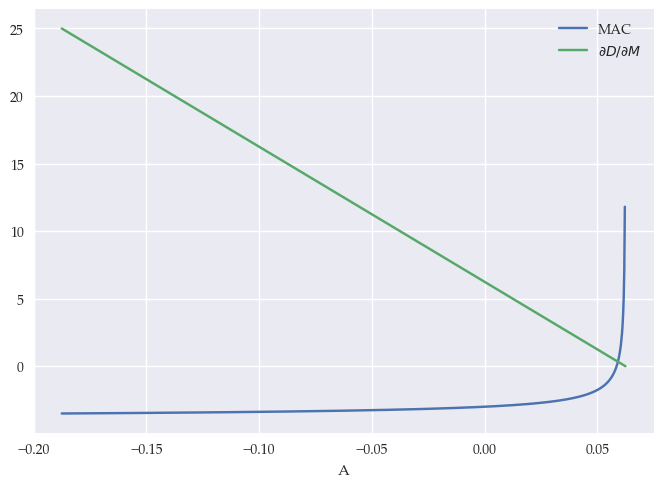

In [86]:
MACgrid = np.array(γ*α*Egrid**(α-1)-pe/ϕ)
MDgrid = np.array(γd*ϕ*Egrid)
Agrid = pd.Index(M_0-ϕ*Egrid, name = 'A')
MACgrid = pd.Series(MACgrid, index = Agrid, name = 'MAC')
MDgrid = pd.Series(MDgrid, index = Agrid, name = '$\partial D/\partial M$')
df = pd.concat([MACgrid, MDgrid], axis = 1)
df.plot()

## Q2. Marginal Abatement Costs With Technical Abatement 

In the second exercise, we consider the model from section 2 in *A Simple Model of Abatement Costs*. We generally rely on the same assumptions as in exercise 1 (on parameter values and functional forms). The extension in section 2 is abatement technologies. We assume that there are three technologies that we'll call $T1, T2, T3$. For each technology $i$ we know the following:
* They can at most reduce $\theta_i$ of all emissions (*their potential*).
* It costs, on average, $c_i$ €/ton of \CO2 reductions. 
* It is cheaper to reduce the first ton of emissions than the last one (increasing costs). $\sigma_i$ is a measure of the dispersion in the costs within each technology.

In this exercise, we will specifically assume that the costs of using each technology are log-normally distributed. You are not expected to go through the math, but appendix A in *A Simple Model of Abatement Costs* shows how to derive the various formula (for the interested student). It turns out (cf. appendix A), that when technology costs are log-normally distributed as assumed here, the *optimal* use of these abatement technologies is returned in a nice mathematical form. Following the notation from the lecture note, we have that for each technology $i$:

$$\begin{align}
    a_i^* &= \Phi\left(\dfrac{\ln\left(\frac{D'(M)}{c_i}\right)+\sigma_i^2/2}{\sigma_i}\right),
\end{align}$$
where $\Phi$ is the standard normal CDF. The costs of using the abatement technology $i$ then follows from:
$$\begin{align}
    f_i(a_i^*) &= c_i\Phi\left(\dfrac{\ln\left(\frac{D'(M)}{c_i}\right)-\sigma_i^2/2}{\sigma_i}\right),
\end{align}$$


In our case, we assume that technology data is provided in the form:

| **Technology** | $\theta_i$ | $c_i$ | $\sigma_i$ |
| --- | --- | --- | --- |
| $T1$ | $0.1$ | $0.5$ | $0.1$ |
| $T2$ | $0.2$ | $2$ | $0.2$ |
| $T3$ | $0.3$ | $5$ | $0.05$ |

*We define technology data:*

In [87]:
Tech = pd.Index(['T1','T2', 'T3'], name = 'i')
θ = pd.Series([0.1, 0.2, 0.3], index = Tech, name  = 'θ')
c = pd.Series([0.5, 2, 5], index = Tech, name = 'c')
σ = pd.Series([.1, .2, .05], index = Tech, name = 'σ')

*Defining parameters with the ```Tech``` as the index, we can now access the appropriate values using simple "slicing" syntax:*

In [88]:
θ['T1'] # get the θ parameter for technology T1

0.1

*Also, we make it easier to use the cumulative normal distribution $\Phi$ by re-naming this as a shorthand from ```scipy.stats.norm.cdf```:*

In [89]:
Φ = stats.norm.cdf
Φ(0) # this is the syntax used from hereon to call the cdf

0.5

### **Q 2.1. Technological Abatement as Function of $D'(M)$**

*As you can see in the formula for $a^*$ and $f_i(a_i^*)$, the main input required is the marginal damages. So, in order to visualize the optimal technical abatement, we start by defining ```MDgrid``` as a linearly spaced grid of marginal damages from 0 to 10. Here, we define it as an index to be used in functions below:*

In [90]:
MDgrid = pd.Index(np.linspace(np.finfo(float).eps, 10, 1000), name = "$D'(M)$") # np.finfo(float).eps is the lowest float-value that is larger than zero; this is to avoid taking ln(0) in the following which throws a warning.

1. *Define a function ```func_aopt_i(md, i)``` that takes marginal damages ```md``` and the technology ```i``` and returns $a_i^*$.*
2. *Define a function ```func_faopt_i(md, i)``` that takes marginal damages ```md``` and the technology ```i``` and returns $f_i(a_i^*)$.*
3. *Create a ```pd.DataFrame``` called ```df_aopt``` with $a_i^*(D'(M))$ values. The rows indicate different values of marginal damages (from ```MDgrid```) and the columns indicate the different technologies.*
4. *Create a similar dataframe with the associated costs ```df_faopt```.*
5. *Multiply ```df_aopt``` with $\theta$ and define the sum over the columns as ```aoptSum```. Do the same for ```df_faopt```.*
6. *Plot the two.*

<Axes: >

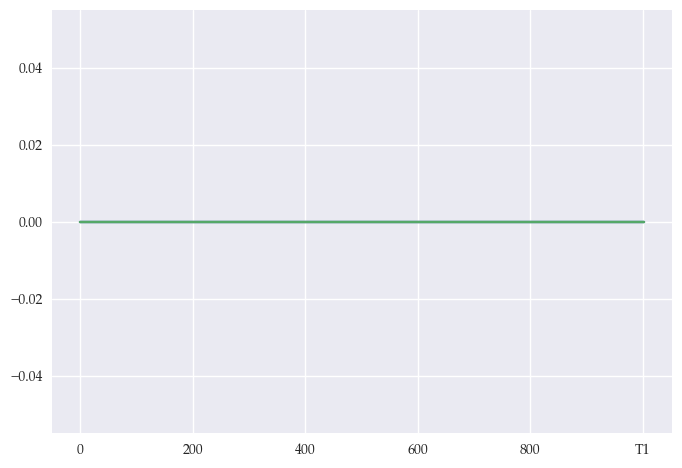

In [103]:
def func_aopt_i(md, i: str):
    return Φ((np.log(md / c[i]) - (σ[i]**2) / 2) / σ[i])


def func_faopt_i(md,i: str):
    return c[i] * Φ((np.log(md / c[i]) - (σ[i]**2) / 2) / σ[i])

#df_aopt = pd.DataFrame({'T1': func_aopt_i(MDgrid, 'T1'), 'T2': func_aopt_i(MDgrid, 'T2'), 'T3': func_aopt_i(MDgrid, 'T3')})
df_aopt = pd.DataFrame([func_aopt_i(MDgrid, 'T1'), func_aopt_i(MDgrid, 'T2'), func_aopt_i(MDgrid, 'T3')])
#df_faopt = pd.DataFrame({'T1': func_faopt_i(MDgrid, 'T1'), 'T2': func_faopt_i(MDgrid, 'T2'), 'T3': func_faopt_i(MDgrid, 'T3')})
df_faopt = pd.DataFrame([func_faopt_i(MDgrid, 'T1'), func_faopt_i(MDgrid, 'T2'), func_faopt_i(MDgrid, 'T3')])
aoptSum = np.sum(df_aopt * θ)
faoptSum = np.sum(df_faopt * θ)
aoptSum.plot()
faoptSum.plot()

### **Q 2.2. Reconstruct figure 2.1 from the lecture note**

*Figure 2.1 shows how the technical abatement mitigates climate damages through lowering actual emissions. The plot shows the right-hand side of equation (7) plotted for a range of $D'(M)$-values.*

1. *Use that we already have $\sum_i \theta_ia_i$ and $\sum_i \theta_if_i(a_i)$ defined from Q2.1 to define ```margCostOfM``` as the right-hand side of (7) for each $D'(M)$ from ```MDgrid```.*
2. *Try to use this to plot something like figure 2.1 in the lecture note.*

### **Q 2.3. Optimal solution (Extra)**

*With technical abatement, the optimal level of fossil energy consumption $E^*$ is the one that solves*

$$\begin{align}
    \dfrac{F'(E)- p_e}{\phi} = D'(M)\left(1-\sum_i\theta_ia_i\right)+\sum_i\theta_if_i(a_i),     \qquad D'(M) = \gamma_D M \tag{2a} \\
\end{align}$$

*where* 

$$\begin{align}
    M &= \phi E\left(1-\sum_i \theta_ia_i\right), \tag{2b} \\
    a_i &= \Phi\left(\dfrac{\ln\left(\frac{D'(M)}{c_i}\right)+\sigma_i^2/2}{\sigma_i}\right) \tag{2c} \\ 
    f_i(a_i) &= c_i\Phi\left(\dfrac{\ln\left(\frac{D'(M)}{c_i}\right)-\sigma_i^2/2}{\sigma_i}\right) \tag{2d}
\end{align}$$

*Show that we can combine all of these equations into a single one that depends only on $M$ such that:*
$$\begin{align}
    \alpha \gamma \left(\dfrac{M}{\phi\left[1-a^{sum}\left(M\right)\right]}\right)^{\alpha-1}-p_e = \phi \gamma_D M \left[1-a^{sum}\left(M\right)\right]+\phi f^{sum}\left(M\right), \tag{3}
\end{align}$$
*where $a^{sum}(\gamma_D M)$ and $f^{sum}(\gamma_D M)$ are functions of $M$ as*

$$\begin{align}
    a^{sum}\left(M\right) &= \sum_i\theta_i \Phi\left(\dfrac{\ln\left(\frac{\gamma_D M}{c_i}\right)+\sigma_i^2/2}{\sigma_i}\right) \\
    f^{sum}\left(M\right) &= \sum_i\theta_i c_i\Phi\left(\dfrac{\ln\left(\frac{\gamma_D M}{c_i}\right)-\sigma_i^2/2}{\sigma_i}\right).
\end{align}$$

### **Q 2.4. Optimal solution, continued (extra)**

*Use ```scipy.optimize.fsolve``` to identify the optimal solution $M^*$. Then, define optimal $E^*, C^*$. In order to do so, the following snippets define the functions $a^{sum}, f^{sum}$ as a function of $M$:*

```python
aSum = lambda M: sum([θ[i]*func_aopt_i(γd * M, i) for i in Tech])
fSum = lambda M: sum([θ[i]*func_faopt_i(γd * M, i) for i in Tech])
```

*Once you have identified $M^*$, you can compute $E^*$ from (2b) and $C^*$ from equation (5) in the lecture note.*

*Hint: When solving for $M^*$, you need a relatively good initial guess for numerical optimization to work. Use ```x0 = M0/2```.*